## 1. Fixau la temperatura mitjana a 20 graus.
## 2. Duplicau l'amplitud de les temperatures anòmales.
## 3. Canviau la mida de la mostra a 500 valors

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

# 1. temperatura mitjana a 20 graus
# 2. Duplicau l'amplitud de les temperatures anòmales
# 3. samples = 500

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
    np.random.seed(42)
    temperature = np.random.normal(20, 2, samples)  # Normal temperatures around 25°C
    # Introduce anomalies (very high or low temperatures)
    temperature[::50] = np.random.uniform(-10, 50, samples // 50) # Valor duplicat
    return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
    model = IsolationForest(contamination=0.05, random_state=42)
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['temperature'], label='Temperature')

    # Mark anomalies in red
    anomalies = data[data['anomaly'] == -1]
    plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

    plt.title('IoT Sensor Data - Anomaly Detection')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

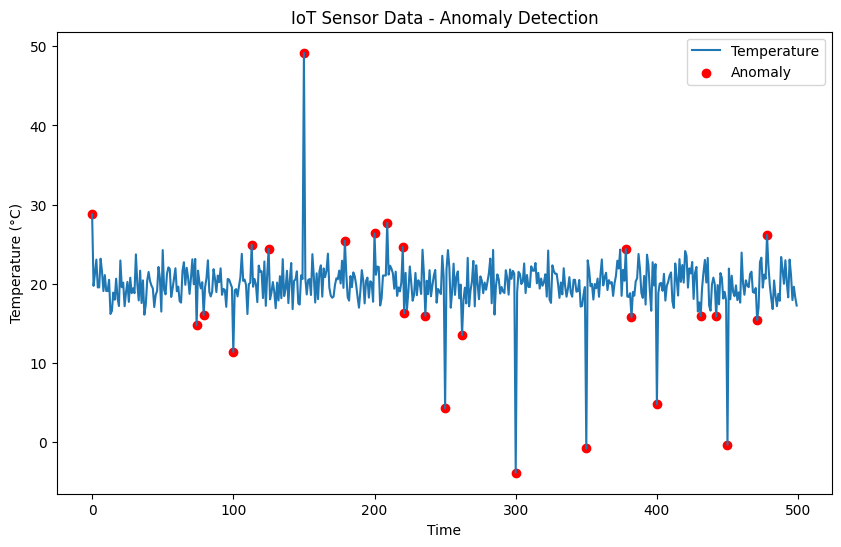

In [15]:
sensor_data = simulate_sensor_data(500)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data)

## 4. Experimentau amb diferents valors del paràmetre contamination. Quin és el seu efecte?

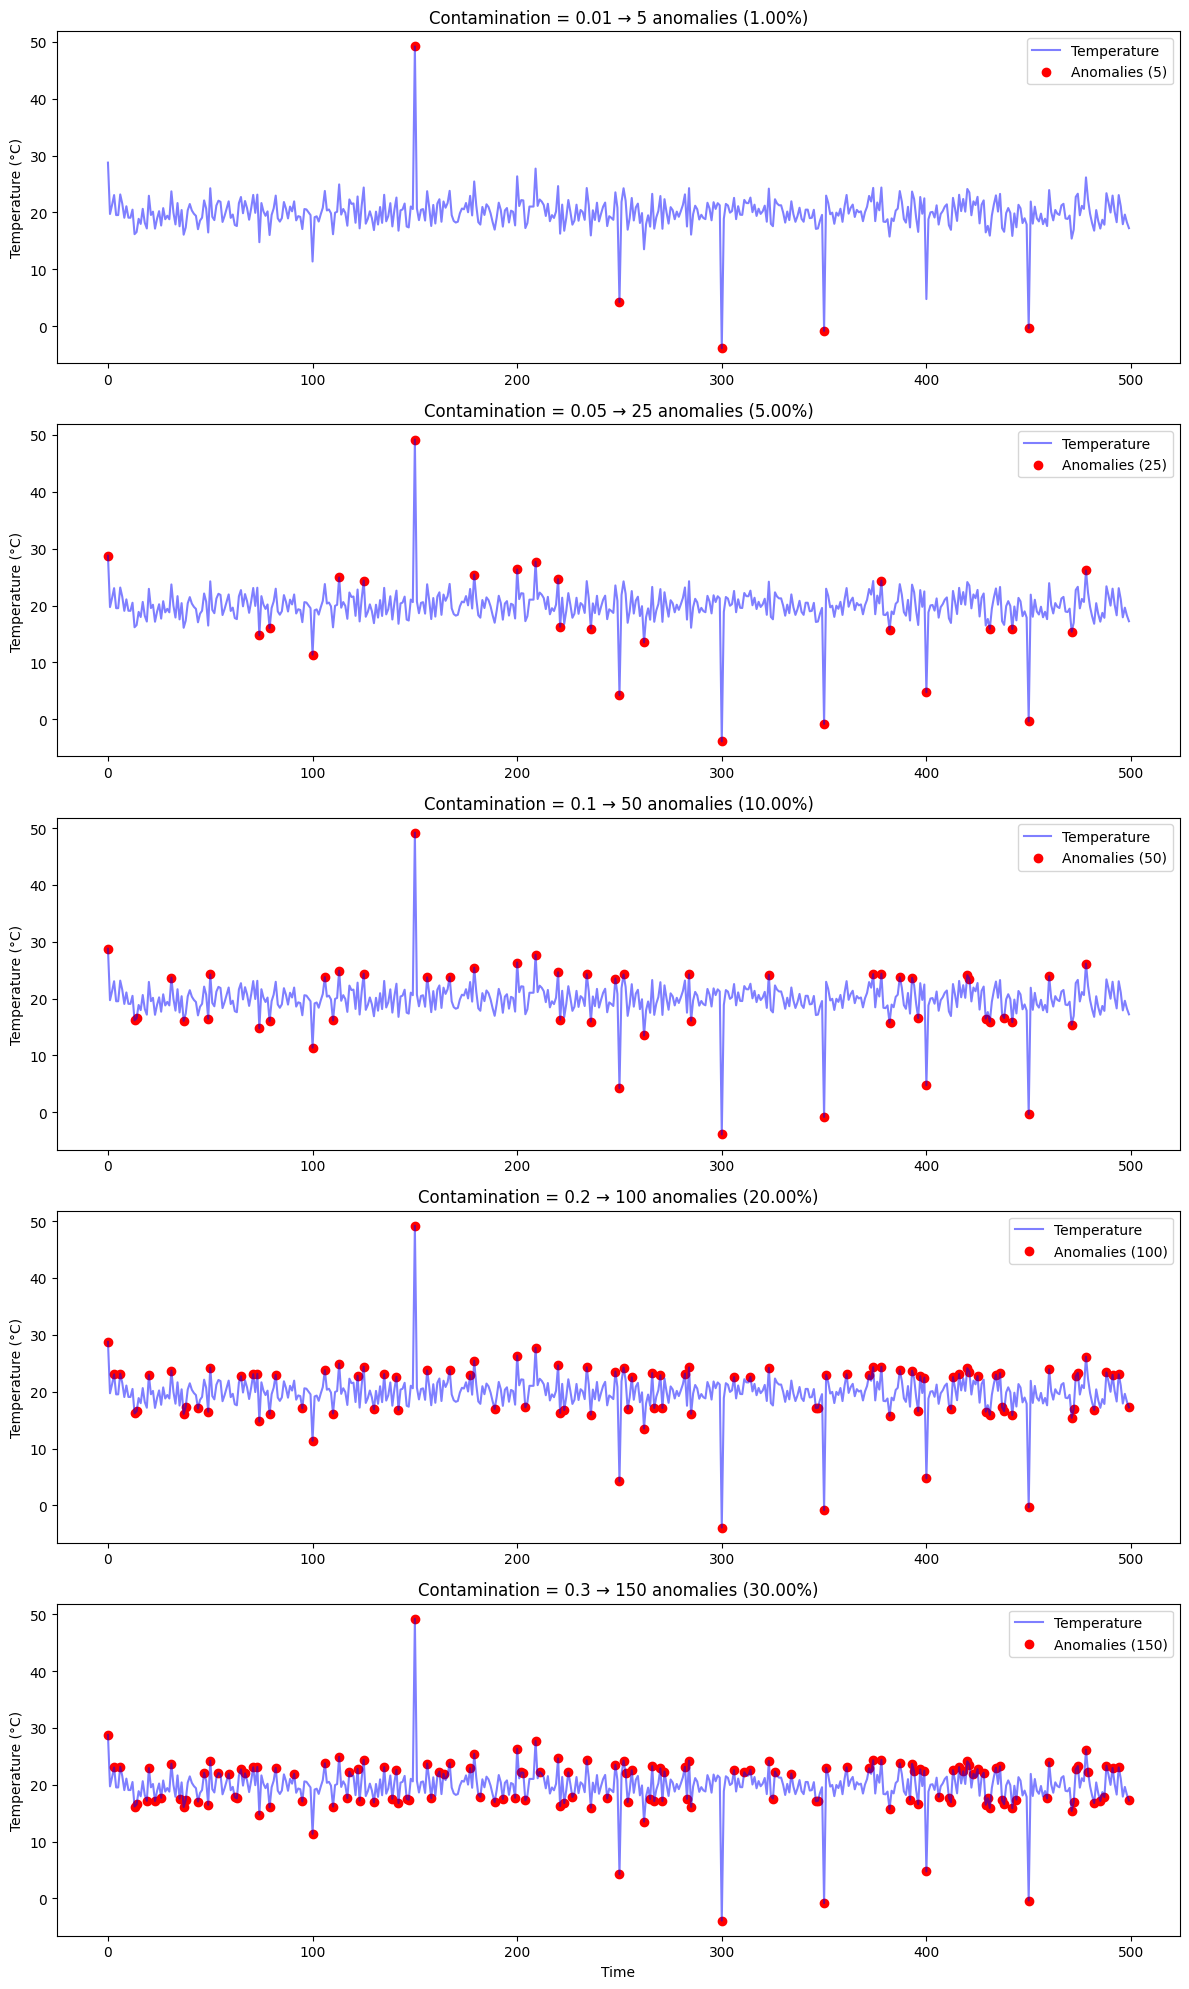


Detailed Analysis of Contamination Effect:

Contamination: 0.01
  Detected anomalies: 5 (1.00%)
  Expected percentage: 1.00%
  Difference: 0.00%
  Anomaly temperature range: -3.89°C to 49.19°C
  Anomaly temperature mean: 9.67°C

Contamination: 0.05
  Detected anomalies: 25 (5.00%)
  Expected percentage: 5.00%
  Difference: 0.00%
  Anomaly temperature range: -3.89°C to 49.19°C
  Anomaly temperature mean: 17.47°C

Contamination: 0.1
  Detected anomalies: 50 (10.00%)
  Expected percentage: 10.00%
  Difference: 0.00%
  Anomaly temperature range: -3.89°C to 49.19°C
  Anomaly temperature mean: 19.34°C

Contamination: 0.2
  Detected anomalies: 100 (20.00%)
  Expected percentage: 20.00%
  Difference: 0.00%
  Anomaly temperature range: -3.89°C to 49.19°C
  Anomaly temperature mean: 20.07°C

Contamination: 0.3
  Detected anomalies: 150 (30.00%)
  Expected percentage: 30.00%
  Difference: 0.00%
  Anomaly temperature range: -3.89°C to 49.19°C
  Anomaly temperature mean: 19.91°C


In [16]:
# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=500):
    np.random.seed(42)
    temperature = np.random.normal(20, 2, samples)
    temperature[::50] = np.random.uniform(-10, 50, samples // 50)
    return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest with configurable contamination
def detect_anomalies(data, contamination_value):
    model = IsolationForest(contamination=contamination_value, random_state=42)
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

# Step 3: Visualize the effect of different contamination values
def analyze_contamination_effect():
    # Generate one consistent dataset
    data = simulate_sensor_data()

    # Test different contamination values
    contamination_values = [0.01, 0.05, 0.1, 0.2, 0.3]

    # Create a figure with subplots
    fig, axs = plt.subplots(len(contamination_values), 1, figsize=(12, 4*len(contamination_values)))

    results = {}

    for i, cont in enumerate(contamination_values):
        # Apply anomaly detection
        result = detect_anomalies(data.copy(), cont)

        # Count anomalies
        anomaly_count = (result['anomaly'] == -1).sum()
        anomaly_percentage = (anomaly_count / len(result)) * 100

        # Store results for reporting
        results[cont] = {
            'anomaly_count': anomaly_count,
            'anomaly_percentage': anomaly_percentage
        }

        # Plot the data
        ax = axs[i]
        ax.plot(result.index, result['temperature'], label='Temperature', color='blue', alpha=0.5)

        # Mark anomalies
        anomalies = result[result['anomaly'] == -1]
        ax.scatter(anomalies.index, anomalies['temperature'], color='red', label=f'Anomalies ({anomaly_count})')

        ax.set_title(f'Contamination = {cont} → {anomaly_count} anomalies ({anomaly_percentage:.2f}%)')
        ax.set_ylabel('Temperature (°C)')
        ax.legend()

        # Add statistics to the results
        if not anomalies.empty:
            results[cont]['min_temp'] = anomalies['temperature'].min()
            results[cont]['max_temp'] = anomalies['temperature'].max()
            results[cont]['mean_temp'] = anomalies['temperature'].mean()
        else:
            results[cont]['min_temp'] = None
            results[cont]['max_temp'] = None
            results[cont]['mean_temp'] = None

    # Add x-label to the bottom subplot only
    axs[-1].set_xlabel('Time')

    plt.tight_layout()
    plt.savefig('contamination_analysis.png')
    plt.show()

    # Print detailed analysis
    print("\nDetailed Analysis of Contamination Effect:")
    print("=" * 50)

    for cont, result in results.items():
        print(f"\nContamination: {cont}")
        print(f"  Detected anomalies: {result['anomaly_count']} ({result['anomaly_percentage']:.2f}%)")

        # Calculate expected percentage (which is the contamination value itself)
        expected_percentage = cont * 100
        difference = abs(result['anomaly_percentage'] - expected_percentage)
        print(f"  Expected percentage: {expected_percentage:.2f}%")
        print(f"  Difference: {difference:.2f}%")

        # Print temperature statistics for anomalies
        if result['min_temp'] is not None:
            print(f"  Anomaly temperature range: {result['min_temp']:.2f}°C to {result['max_temp']:.2f}°C")
            print(f"  Anomaly temperature mean: {result['mean_temp']:.2f}°C")
        else:
            print("  No anomalies detected")

# Run the analysis
analyze_contamination_effect()

## 5. Afegiu les fronteres de decisió del model. Us serà útil l'exemple de https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

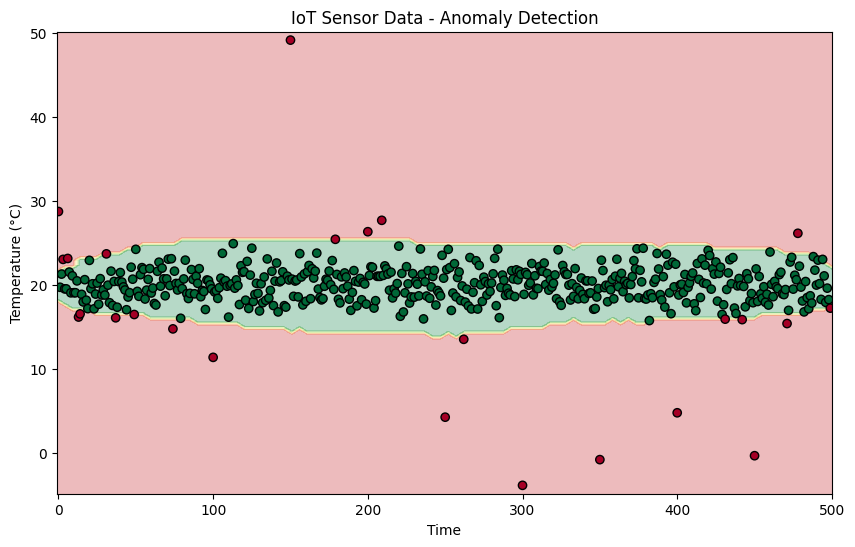

In [17]:
# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
	np.random.seed(42)
	temperature = np.random.normal(20, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	temperature[::50] = np.random.uniform(-10, 50, samples // 50) # Valor duplicat
	return pd.DataFrame({'time': np.arange(samples), 'temperature': temperature}) # Add time as second column

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies_old(data):
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

def detect_anomalies(data, contamination = 0.05):
	model = IsolationForest(contamination=contamination, random_state=42)
	data['anomaly'] = model.fit_predict(data[['time', 'temperature']])
	return model, data

# Step 3: Visualize Sensor Data and Anomalies
def plot_isolated_anomalies(data, model, title='IoT Sensor Data - Anomaly Detection'):
	fig, ax = plt.subplots(figsize=(10, 6))
	# Create the decision boundary
	DecisionBoundaryDisplay.from_estimator(
		model, data[['time', 'temperature']], response_method="predict",
		grid_resolution=100, alpha=0.3, ax=ax, cmap='RdYlGn'
	)

	ax.scatter(data['time'], data['temperature'], c=data['anomaly'], cmap='RdYlGn', edgecolors='k')
	ax.set_title(title)
	ax.set_xlabel('Time')
	ax.set_ylabel('Temperature (°C)')
	plt.show()

sensor_data = simulate_sensor_data(500)
analyzed_model, analyzed_data = detect_anomalies(data=sensor_data)
plot_isolated_anomalies(data=analyzed_data, model=analyzed_model)

## 6. Executau el quadern sobre dades reals de temperatura d'alguna de les fonts disponibles a https://thingspeak.mathworks.com/channels/public

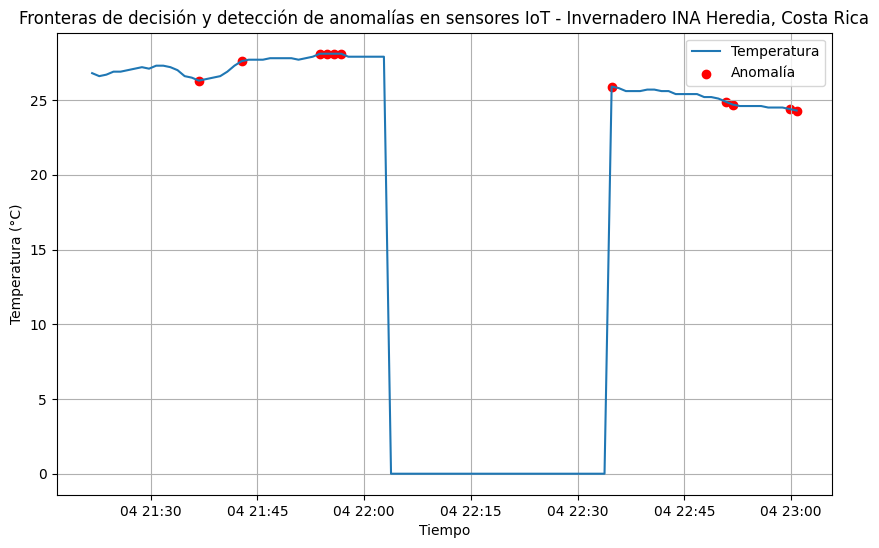

In [18]:
url = "https://thingspeak.mathworks.com/channels/2879732/field/1.csv"

def prepare_data(url):
    df = pd.read_csv(url)
    df['field1'] = pd.to_numeric(df['field1'], errors='coerce')
    df = df.dropna().reset_index(drop=True)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.set_index('created_at')
    df.rename(columns={'field1': 'temperature'}, inplace=True)
    return df

def detect_anomalies(data):
    model = IsolationForest(contamination=0.20, random_state=42)
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

def plot_anomalies(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['temperature'], label='Temperatura')
    anomalies = data[data['anomaly'] == -1]
    plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomalía')
    plt.title('Fronteras de decisión y detección de anomalías en sensores IoT - Invernadero INA Heredia, Costa Rica')
    plt.xlabel('Tiempo')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

sensor_data = prepare_data(url)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data)